# Predicting Diabetic Patient Readmissions using XGB
# BY: ARYAN SHARMA
# ROLL: 727723EUCS020

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Load & Understand Dataset

In [2]:
df=pd.read_csv("/kaggle/input/diabetic-patients-readmission-prediction/diabetic_data.csv")
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
df=df.drop(columns=["max_glu_serum","A1Cresult"])

In [7]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [8]:
cat_cols=df.select_dtypes(include='object').columns
print(cat_cols)

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [9]:
df_encoded=pd.get_dummies(df,columns=cat_cols,drop_first=True)
df_encoded

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,readmitted_>30,readmitted_NO
0,2278392,8222157,6,25,1,1,41,0,1,0,...,False,False,False,False,False,False,True,False,False,True
1,149190,55629189,1,1,7,3,59,0,18,0,...,False,False,False,False,False,False,False,True,True,False
2,64410,86047875,1,1,7,2,11,5,13,2,...,False,False,False,False,False,False,True,True,False,True
3,500364,82442376,1,1,7,2,44,1,16,0,...,False,False,False,False,False,False,False,True,False,True
4,16680,42519267,1,1,7,1,51,0,8,0,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,7,3,51,0,16,0,...,False,False,False,False,False,False,False,True,True,False
101762,443847782,74694222,1,4,5,5,33,3,18,0,...,False,False,False,False,False,False,True,True,False,True
101763,443854148,41088789,1,1,7,1,53,0,9,1,...,False,False,False,False,False,False,False,True,False,True
101764,443857166,31693671,2,3,7,10,45,2,21,0,...,False,False,False,False,False,False,False,True,False,True


In [10]:
df_encoded.shape

(101766, 2432)

In [11]:
x=df_encoded.drop('readmitted_>30', axis=1)
y=df_encoded['readmitted_>30']

In [12]:
x.head()
y.value_counts()

readmitted_>30
False    66221
True     35545
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()

X_scaled=scale.fit_transform(x)

In [14]:
print(np.mean(X_scaled))
print(np.std(X_scaled))

-8.409566570229772e-19
1.0000000000000557


In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

# XGBOOST

In [16]:
!pip install xgboost

In [18]:
from xgboost import XGBClassifier

model_baseline = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model_baseline.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:18:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [19]:
y_pred=model_baseline.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))

print("ROC AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.84      0.91     13245
        True       0.77      0.99      0.87      7109

    accuracy                           0.89     20354
   macro avg       0.88      0.92      0.89     20354
weighted avg       0.92      0.89      0.90     20354

ROC AUC: 0.916689965096695


# MAKING IT IMBALANCE FOR SMOTE & XGBOOST

In [21]:
y_original = df['readmitted']
y_binary = y_original.apply(lambda x: 1 if x == '<30' else 0)
print(y_binary.value_counts(normalize=True))

readmitted
0    0.888401
1    0.111599
Name: proportion, dtype: float64


In [22]:
!pip install imbalanced-learn

In [23]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
X_smote,y_smote=smote.fit_resample(X_scaled,y)
print(y_smote.value_counts())

readmitted_>30
False    66221
True     66221
Name: count, dtype: int64


In [24]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42
)

In [25]:
model_smote = XGBClassifier(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

model_smote.fit(X_train_s, y_train_s)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [26]:
y_pred_smote = model_smote.predict(X_test_s)

print(classification_report(y_test_s, y_pred_smote))
print("ROC AUC:", roc_auc_score(y_test_s, y_pred_smote))

              precision    recall  f1-score   support

       False       1.00      0.84      0.91     13258
        True       0.86      1.00      0.92     13231

    accuracy                           0.92     26489
   macro avg       0.93      0.92      0.92     26489
weighted avg       0.93      0.92      0.92     26489

ROC AUC: 0.9178957027772251


# Weighted XGBoost

In [27]:
import numpy as np

neg = np.sum(y == 0)
pos = np.sum(y == 1)

scale_weight = neg / pos
print(scale_weight)

1.8630187086791392


In [30]:
model_weighted = XGBClassifier(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=scale_weight,
    random_state=42,
    eval_metric='logloss'
)

model_weighted.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [32]:
y_pred_weighted = model_weighted.predict(X_test)

print(classification_report(y_test, y_pred_weighted))
print("ROC AUC:", roc_auc_score(y_test, y_pred_weighted))

              precision    recall  f1-score   support

       False       1.00      0.84      0.91     13245
        True       0.77      1.00      0.87      7109

    accuracy                           0.89     20354
   macro avg       0.88      0.92      0.89     20354
weighted avg       0.92      0.89      0.89     20354

ROC AUC: 0.9168007939361529


# Plot ROC Curve & Precision–Recall Curve

In [33]:
# Baseline model
y_prob_base = model_baseline.predict_proba(X_test)[:, 1]

In [34]:
# Weighted XGBoost
y_prob_weighted = model_weighted.predict_proba(X_test)[:, 1]

In [35]:
# SMOTE model
y_prob_smote = model_smote.predict_proba(X_test_s)[:, 1]

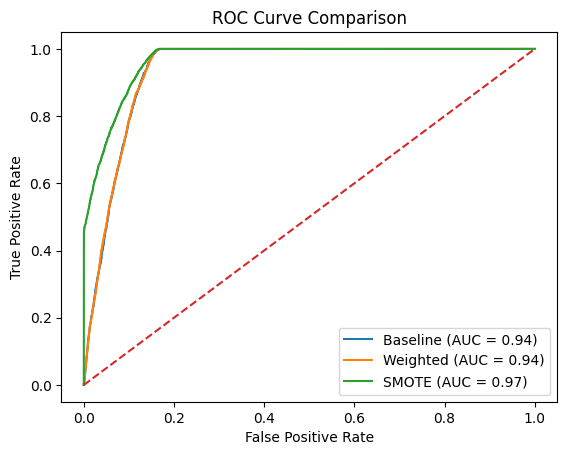

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC for baseline
fpr_b, tpr_b, _ = roc_curve(y_test, y_prob_base)
roc_b = auc(fpr_b, tpr_b)

# ROC for weighted
fpr_w, tpr_w, _ = roc_curve(y_test, y_prob_weighted)
roc_w = auc(fpr_w, tpr_w)

# ROC for SMOTE
fpr_s, tpr_s, _ = roc_curve(y_test_s, y_prob_smote)
roc_s = auc(fpr_s, tpr_s)

# Plot
plt.figure()
plt.plot(fpr_b, tpr_b, label=f'Baseline (AUC = {roc_b:.2f})')
plt.plot(fpr_w, tpr_w, label=f'Weighted (AUC = {roc_w:.2f})')
plt.plot(fpr_s, tpr_s, label=f'SMOTE (AUC = {roc_s:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

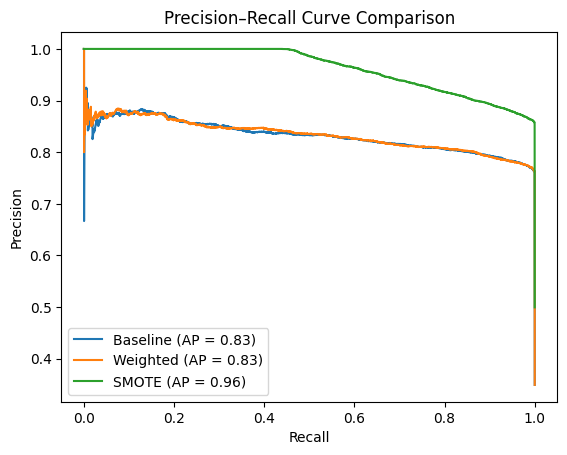

In [37]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# PR curves
p_b, r_b, _ = precision_recall_curve(y_test, y_prob_base)
ap_b = average_precision_score(y_test, y_prob_base)

p_w, r_w, _ = precision_recall_curve(y_test, y_prob_weighted)
ap_w = average_precision_score(y_test, y_prob_weighted)

p_s, r_s, _ = precision_recall_curve(y_test_s, y_prob_smote)
ap_s = average_precision_score(y_test_s, y_prob_smote)

# Plot
plt.figure()
plt.plot(r_b, p_b, label=f'Baseline (AP = {ap_b:.2f})')
plt.plot(r_w, p_w, label=f'Weighted (AP = {ap_w:.2f})')
plt.plot(r_s, p_s, label=f'SMOTE (AP = {ap_s:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison")
plt.legend()
plt.show()

# Hyperparameter Tuning for XGBoost

In [38]:
import pandas as pd

results = {
    "Model": ["Baseline XGBoost", "Weighted XGBoost", "SMOTE + XGBoost"],
    "Recall (Minority)": [0.99, 1.00, 1.00],
    "F1 Score (Minority)": [0.87, 0.87, 0.92],
    "ROC-AUC": [0.89, 0.916, 0.918]
}

df_results = pd.DataFrame(results)
print(df_results)

              Model  Recall (Minority)  F1 Score (Minority)  ROC-AUC
0  Baseline XGBoost               0.99                 0.87    0.890
1  Weighted XGBoost               1.00                 0.87    0.916
2   SMOTE + XGBoost               1.00                 0.92    0.918
